# IN269 Kecerdasan Bisnis
## Pertemuan 14: Expectation & Maximization & Density Estimation

## Expectation Maximization
Expectation Maximization, or EM for short, is a clever way to deal with situations where we don't have all the information we need, but still want to make good guesses about how things work.

- Imagine you’re trying to figure out how fair two coins are (let’s call them Coin A and Coin B).
- Each coin might be biased (maybe one tends to land on heads more often than tails).
- But the problem is: 
> _sometimes you don’t even know which coin was tossed $\Rightarrow$ you only see the result (heads or tails)._

- That’s incomplete data.

## What Normally Happens (Complete Data)
If you always knew:
- which coin was tossed, and
- whether it landed heads or tails,
then you could easily estimate each coin’s bias:
$$
    \theta_A = \frac{\text{number of heads from Coin }A }{\text{total tosses of Coin }A}   \\
    \theta_B = \frac{\text{number of heads from Coin }B }{\text{total tosses of Coin }B}
$$
     
This is just like saying:
> "_Out of all times we tossed Coin A, what fraction was heads?_"     
   
This straightforward guess is called **Maximum Likelihood Estimation** (MLE).

## The Problem

- But in real life (and in many data problems), **we often don’t know which coin was tossed**. 
- We only see the heads/tails results. 
- This makes it tricky to calculate biases directly.

## Big Picture
- Why it matters: EM helps in many real-world problems where data is incomplete (medical tests, patient histories, genetics, etc.).
- In simple words:
<div class="alert alert-block alert-info">
    <i>EM is like solving a puzzle when some pieces are missing $\Rightarrow$ you keep making educated guesses about the missing pieces and adjusting your solution until it all fits together.</i>
</div>    

<div class="alert alert-block alert-success">
    <b>Expectation Maximization is a method to figure out hidden or missing information by guessing and improving the guesses step by step, until the best explanation for the data is found.</b>
</div>

## Example: Students and Exam Scores

- Imagine you’re a teacher. 
- You give a test, but some students don’t write their names on the paper.
- So you have a pile of scores, but you don’t know which scores belong to which students.

## If You Had Full Information (Complete Data)
If every test had a name on it, you could easily calculate:
- How well Student A usually does (average score).
- How well Student B usually does, and so on.     
   
That’s just like counting heads and tails when you know which coin was tossed.

## The Problem (Incomplete Data)

- But since some papers are missing names, you don’t know exactly which student got which score.
- This is like the “which coin was tossed” problem $\Rightarrow$ you’re missing part of the information.

## How EM Helps

The **Expectation-Maximization** (EM) algorithm says:
1. **Expectation step (E-step)**: Make your best guess about which student likely wrote which test (for example: _"This high score probably belongs to the smart student, and this low one to the struggling student"_).
2. **Maximization step (M-step)**: Use those guesses to update your estimate of each student’s average ability.

You repeat steps 1 and 2 over and over. Each time, your guesses get better and your averages become more accurate.     
Eventually, you’ll have a pretty good picture of each student’s performance $\Rightarrow$ even though some test papers had missing names! 


## Why It’s Useful
This kind of situation (missing labels, incomplete info) happens everywhere:
- In hospitals: patient records may miss some test results.
- In marketing: you may not know exactly which ads influenced which purchases.
- In genetics: you may not know which gene group a sample came from.    
    
EM gives a systematic way to still learn from the messy data.

## In short:
Expectation Maximization = **Guess missing info** $\Rightarrow$ **Recalculate** $\Rightarrow$ **Repeat until stable**.

<center>
    <img src="images/cookie-mystery.png" width="1000" />
</center>

## Visualisasi Expectation-Maximization 
- [Link](https://davpinto.github.io/ml-simulations/)

## Hands-on Example: EM
- Let's take an example and see how this works in Python. For this experiment, we will use the Diabetes dataset available as part of the Scikit-learn package.   
- Let's go ahead and import the required packages and this dataset:

## Gaussian Mixture
- [Multivariate Normal Distribution](http://www2.imm.dtu.dk/courses/02450/DemoNormal.html)
- [Visualisasi](https://davpinto.github.io/ml-simulations/)

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.mixture import GaussianMixture

In [2]:
# load the included diabetes dataset
diab = load_diabetes(as_frame=True)
print(diab.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

Let's extract the appropriate data to apply the EM algorithm to:

In [3]:
diab_df = diab.data
print(diab.target)

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64


In [4]:
# since we are not performing regression, we can add the target column
diab_df['s7'] = diab.target

In [5]:
# print a summary of our data
print(diab_df.describe())

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

This will generate an output that shows a table with 8 rows and 11 columns.    
   
- Now that we have the right kind of data in the right kind of format, we are ready to run EM on it.    
- Specifically, given that we are going to use EM as a clustering mechanism, we will need to pick some number of clusters and decide how they are initialized.
- Let us go with four, initialized in a random fashion. 
- This is an easy, one-line task.
- Once we do that, we will extract cluster assignments for each data point and plot them along the dimensions of _bmi_ and _bp_.

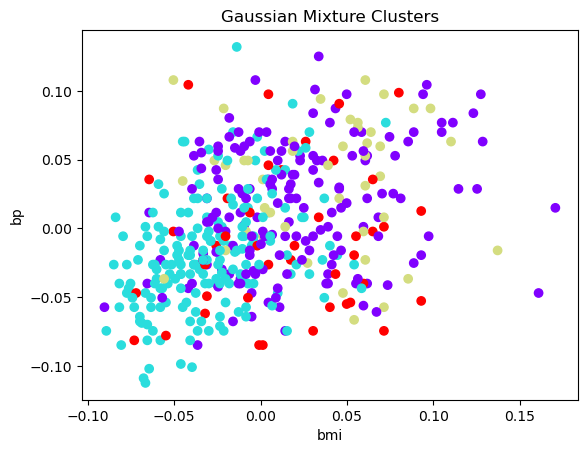

In [6]:
em_gaussian = GaussianMixture(n_components=4, init_params='random', covariance_type='full')
cluster_preds = em_gaussian.fit_predict(diab_df)
plt.title('Gaussian Mixture Clusters')

# We can pick two dimensions of the input data in order to visualize clusters
# in R^2. Note that this output will look different depending on which
# dimensions you choose to plot
plt.xlabel('bmi')
plt.ylabel('bp')
plt.scatter(diab_df['bmi'], diab_df['bp'], c=cluster_preds, cmap='rainbow')
plt.savefig('simple_diabetes_clusters.png', dpi=300)



- Note that our data consists of many dimensions, but because we are able to create such visualizations in two dimensions only, we picked `bmi` and `bp`. 
- Go ahead and pick some other dimensions to do the above plot.
- It may seem that our clustering has not worked so well because we see lots of overlaps.
- But this is due to the fact that we are plotting high-dimensional data onto very low (two) dimensions. 
- In other words, do not read much into this visualization.

- So, if visualization does not help, how can we ensure that the clusters are good? EM does not have a clear way to assess how well the model is built, like we are able to do for our classification models. 
- To overcome this there are ways we can look into the goodness of the model. 
- There are several criteria for evaluating this, such as the **Akaike information criterion (AIC)**, the **Bayesian information criterion (BIC)**, and the **log likelihood**.


- The AIC provides an estimate of the relative information loss by a given model when representing the process that generated the data. 
- Let's say a model has been generated from a model where $k$ is the number of estimated parameters. 
- If $\hat{L}$ is the maximum value of the likelihood function for the model, then the AIC value is calculated as:        

$$
    \text{AIC} = 2k - 2 \ln(\hat{L}).
$$
- The BIC, on the other hand, estimates the posterior probability of a model being true from a certain Bayesian setup. 
- A lower BIC means that a model is considered more likely to be a better model. 
- The formula for BIC is:
   
$$
    \text{BIC} = \ln(n) k - 2 \ln(\hat{L}).
$$
dengan $n$ adalah number of data points.   

- Both AIC and BIC are penalized-likelihood criteria. 
- This means that the higher the number the worse the model. 
- The only difference between AIC and BIC is the choice of $\log n$ versus $2$.
- For the clustering model we just created we can easily find out its AIC and BIC values with the following:

In [7]:
# View the akaike information criterion
print(em_gaussian.aic(diab_df))

# View the bayesian information criterion
print(em_gaussian.bic(diab_df)) 


-14437.568130038431
-13165.170756712267


- These lines will print out two different numbers. 
- Do not overthink these. 
- They are **not** like a correlation coefficient or a slope of a line; there is no physical interpretation of them in isolation. 
- What you could do is compare AIC (or BIC) values of different models generated using different parameters on the same data. 
- For instance, we created four clusters here.

<div class="alert alert-block alert-danger">
    <ul>
        <li>Want to find out if three or five clusters is better? Go ahead and create those models and find out their AIC and BIC values.</li>
        <li>Whichever gives the lowest AIC and/or BIC is the best model.</li>
    </ul>
</div>    

## Try It Yourself: EM
- Use the User Knowledge Modeling dataset.    
- Use the EM algorithm to find the MLE parameters of the model.
- Report the AIC and BIC values.

## Density Estimation
- Imagine you’re at a party 🎉 with lots of people spread around the room.
- Some areas are crowded (high density), while other areas are nearly empty (low density)
   
> _**Density estimation is about figuring out where the people are grouped together (the crowded zones)**_.    
   
- Those crowded zones can be thought of as clusters.

## What Mean Shift Does
The Mean Shift algorithm is like this:
1. **Pick a random spot in the room**.   
   (Imagine you drop a small flashlight on the floor somewhere.)
2. **Look around in a circle nearby**.     
   You check: “Where are most of the people standing near this spot?”
3. **Move toward the crowd**.    
   You shift your flashlight a little bit toward the area with more people.
4. **Repeat, repeat, repeat...**     
   Each time, you move closer to the densest part of the crowd.   

Eventually, your flashlight will "settle" in the middle of a group of people.    
That settled point is the **center of a cluster**.

## Why It's called "Mean Shift"
- Mean $\Rightarrow$ You’re computing the average position of nearby people.
- Shift $\Rightarrow$ You move your flashlight toward that average.
   
Do this enough times, and you naturally find where the groups are.   

## Clustering with Mean Shift
If you drop flashlights in several places around the room, each one will wander off and settle into different crowded zones.
- One group might form near the snack table 🍕
- Another near the music 🎶
- Another near the door 🚪    
   
These final “settled points” mark the clusters in your data.   

<center>
    <img src="images/mean-shift.png" width="1000" />
</center>    

<div class="alert alert-block alert-success">
    <b>In short</b>:
    <ul>
        <li>The Mean Shift algorithm finds clusters by "following the crowd."</li>
        <li>It keeps moving from less crowded areas to denser areas until it lands at the heart of a group.</li>
    </ul>
</div>    


## Hands-on Example: Density Estimation

In [8]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [9]:
# Import style class from matplotlib and use that to 
# apply ggplot styling
from matplotlib import style
style.use("ggplot")

In [10]:
# Let's create a bunch of points around three centers
# in a 3D space
# X has those points and we can ignore y
centers = [[1,1,1], [5,5,5], [3,10,10]]
X, y = make_blobs(n_samples=100, centers=centers, cluster_std=2)

In [11]:
# Perform clustering using MeanShift algorithm
ms = MeanShift()
ms.fit(X)

c:\Users\Hp\.conda\envs\kec-bis\Lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


,bandwidth,None
,seeds,None
,bin_seeding,False
,min_bin_freq,1
,cluster_all,True
,n_jobs,None
,max_iter,300


In [12]:
# "ms" holds the model; extract information about
# clusters as represented by their centroids, along 
# with their labels
centroids = ms.cluster_centers_
labels = ms.labels_

print(centroids)
print(labels)

[[2.03649665 2.08831537 1.99636297]
 [3.12833823 9.74817202 9.79394696]]
[0 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0
 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1
 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0]


In [13]:
# Find out how many clusters we created
n_clusters = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters)

Number of estimated clusters: 2


In [14]:
# Define a colors array
colors = ["r", "g", "b", "c", "k", "y", "m"]

Coordinate: [4.63971671 1.94087148 8.24842468] Label: 0
Coordinate: [5.47022291 9.76932384 4.62275   ] Label: 1
Coordinate: [ 3.30277204 11.345343    8.77137126] Label: 1
Coordinate: [ 2.84466134 -0.44884241  4.84078128] Label: 0
Coordinate: [ 2.63133306 10.15644182  7.78763891] Label: 1
Coordinate: [ 4.06679657 10.05189544 10.67920971] Label: 1
Coordinate: [4.84133072 4.92452392 3.84266475] Label: 0
Coordinate: [ 2.96240543 -0.76631208  0.74711249] Label: 0
Coordinate: [4.54333365 5.15488388 5.18655659] Label: 0
Coordinate: [ 1.26497759  9.47671561 10.30420416] Label: 1
Coordinate: [ 7.39710244 13.32321577  8.91100105] Label: 1
Coordinate: [3.80535839 5.59324349 2.13628843] Label: 0
Coordinate: [-0.34007507  1.37642889  2.53236815] Label: 0
Coordinate: [-0.17090481 -1.18342815 -0.09448079] Label: 0
Coordinate: [1.99531065 8.66399802 6.42980313] Label: 1
Coordinate: [-0.90282472 -2.47897991 -0.51631024] Label: 0
Coordinate: [ 1.5248424  11.32165076  9.21128361] Label: 1
Coordinate: [ 0

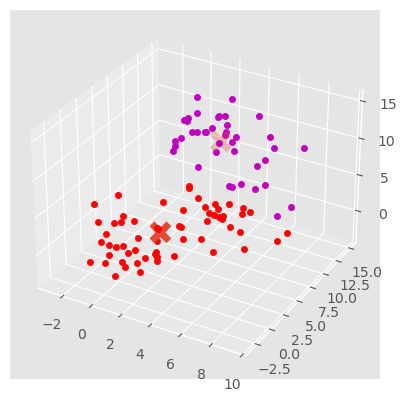

In [15]:
# Let's do a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Loop to go through each data point, plotting it on
# the 3D space with a color picked from the above list-
# one color per cluster
for i in range(len(X)):
    print("Coordinate:", X[i], "Label:", labels[i])
    ax.scatter(X[i][0], X[i][1], X[i][2], 
               c=colors[-labels[i]], marker="o")

ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2],
          marker="x", s=150, linewidths=5, zorder=10)
plt.show()

The plot shows two clusters; you may find a different number of clusters. This is because the data points may be slightly different, and how and where we start applying the _MeanShift_ algorithm may differ.

## Try It Yourself: Density Estimation
Let's try to cluster and analyze the location of Starbucks in the state of Washington. The data we need are:
1. `directory.csv` and
2. `gz_2010_us_040_00_5m.json`
   
With this data, create clustering (density estimation) of Starbucks in Washington. As a bonus challenge, you can visualize this using the map. For this, you would need the following US map data: `gz_2010_us_040_00_5m.json`

<center>
        <h1>The End</h1>
</center>

## Jawab: Density Estimation (Starbucks in Washington)
- Load `directory.csv` and filter rows for Washington (WA).
- Cluster latitude/longitude using Mean Shift (density-based).
- Plot clusters and overlay Washington state boundary from `gz_2010_us_040_00_5m.json`.
- Save the figure as `starbucks_wa_clusters.png`.

In [8]:
# Install required packages in the notebook kernel
%pip install --quiet pandas numpy scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


Number of estimated clusters: 9
Cluster centers (lat, lon):
[[  47.55893617 -122.3139539 ]
 [  45.75142857 -122.63489796]
 [  47.6773913  -117.38978261]
 [  46.918      -120.4636    ]
 [  46.196      -119.0405    ]
 [  47.16       -119.146     ]
 [  46.575      -117.1075    ]
 [  48.13       -119.765     ]
 [  48.55       -117.91      ]]
Saved plot: C:\Users\Hp\1_KEC-BISNIS\kecerdasan-bisnis\slides-14-2025-2026\starbucks_wa_clusters.png


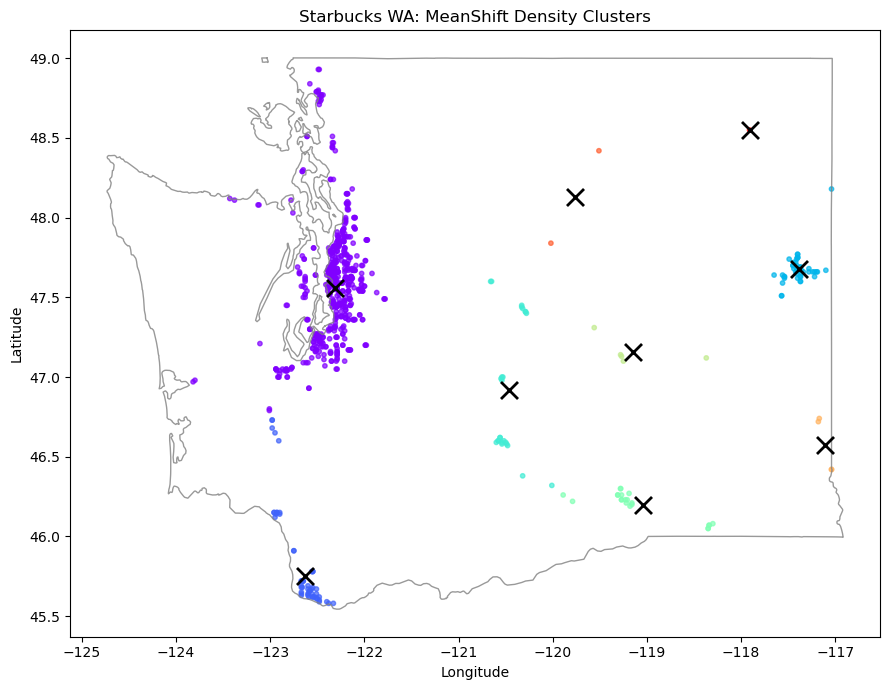

In [9]:
from pathlib import Path
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth

# Resolve data paths robustly (Notebook in slides-14-2025-2026/)
def find_existing(paths):
    for p in paths:
        if Path(p).exists():
            return Path(p)
    return None

dir_csv = find_existing([
    'slides-14-2025-2026/directory.csv',
    'directory.csv'
])
geojson_path = find_existing([
    'slides-14-2025-2026/gz_2010_us_040_00_5m.json',
    'gz_2010_us_040_00_5m.json'
])

if dir_csv is None:
    raise FileNotFoundError("directory.csv not found. Place it next to the notebook or in slides-14-2025-2026/")

# Load Starbucks directory
df = pd.read_csv(dir_csv)

# Identify columns for state/province and lat/lon flexibly
def find_col(df, keywords):
    for kw in keywords:
        for c in df.columns:
            if kw in c.lower():
                return c
    return None

state_col = find_col(df, ['state', 'province'])
lat_col = find_col(df, ['lat'])
lon_col = find_col(df, ['lon', 'lng', 'long'])

if state_col is None or lat_col is None or lon_col is None:
    raise ValueError(f"Missing expected columns. Found columns: {list(df.columns)}")

def is_washington(val):
    s = str(val).strip().lower()
    return s in ('wa', 'washington', 'wash.', 'wash')

wa_df = df[df[state_col].apply(is_washington)].copy()
if wa_df.empty:
    raise ValueError("No Starbucks rows for Washington found. Check state/province values in directory.csv.")

# Prepare coordinates (lat, lon)
X = wa_df[[lat_col, lon_col]].to_numpy()

# Estimate bandwidth for MeanShift and fit
bw = estimate_bandwidth(X, quantile=0.2, n_samples=min(500, len(X))) if len(X) > 1 else 1.0
ms = MeanShift(bandwidth=bw, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
centers = ms.cluster_centers_
n_clusters = len(np.unique(labels))

print(f"Number of estimated clusters: {n_clusters}")
print("Cluster centers (lat, lon):")
print(centers)

# Plot clusters
fig, ax = plt.subplots(figsize=(9, 7))
scatter = ax.scatter(X[:, 1], X[:, 0], c=labels, cmap='rainbow', s=10, alpha=0.7)
ax.scatter(centers[:, 1], centers[:, 0], marker='x', s=150, linewidths=2, color='black', zorder=10)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Starbucks WA: MeanShift Density Clusters')

# Optionally overlay Washington state boundary from GeoJSON
def draw_wa_boundary(ax, geojson_path):
    if geojson_path is None:
        return
    try:
        with open(geojson_path, 'r') as f:
            gj = json.load(f)
        def match_feature(f):
            props = f.get('properties', {})
            name = props.get('NAME') or props.get('name') or props.get('STATE_NAME')
            st = props.get('STATE') or props.get('STATEFP') or props.get('STUSPS')
            return (name and name.lower() == 'washington') or (st and str(st).lower() in ('wa', '53'))
        feat = next((f for f in gj.get('features', []) if match_feature(f)), None)
        if not feat:
            return
        geom = feat.get('geometry', {})
        coords = geom.get('coordinates', [])
        def draw_poly(ax, poly):
            if len(poly) > 0:
                ring = poly[0]  # outer ring
                xs = [pt[0] for pt in ring]
                ys = [pt[1] for pt in ring]
                ax.plot(xs, ys, color='gray', linewidth=1, alpha=0.8)
        if geom.get('type') == 'MultiPolygon':
            for poly in coords:
                draw_poly(ax, poly)
        elif geom.get('type') == 'Polygon':
            draw_poly(ax, coords)
    except Exception as e:
        print(f"Warning: could not draw WA boundary: {e}")

draw_wa_boundary(ax, geojson_path)
plt.tight_layout()
out_path = Path('starbucks_wa_clusters.png')
plt.savefig(out_path, dpi=300)
print(f"Saved plot: {out_path.resolve()}")

- Tip: If you want to compare different clustering bandwidths, vary `quantile` in `estimate_bandwidth()` and re-run. Lower AIC/BIC is better only for likelihood-based models (e.g., GMM).
- Here we used Mean Shift (density-based), which does not have AIC/BIC; for AIC/BIC, fit a `GaussianMixture` on `[lat, lon]` and compare values across different `n_components`.  